In [1]:
import pandas as pd
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
data = pd.read_csv('data/data_train_DF.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,CNT,BA,lon,lat,area,year,month,lc1,lc2,lc3,...,clim1,clim2,clim3,clim4,clim5,clim6,clim7,clim8,clim9,clim10
0,0.0,0.000000,-95.25,49.25,0.24,1993,3,0.000006,0.015857,0.000023,...,0.222032,0.166899,265.457680,268.867126,-0.005898,9.187450e+06,-5231370.50,97849.906250,-0.000340,0.000448
1,0.0,0.000000,-94.75,49.25,0.39,1993,3,0.000005,0.002749,0.000002,...,0.184119,0.142053,265.521764,268.412354,-0.001131,6.993830e+06,-4851900.00,97954.703125,-0.000264,0.000462
2,0.0,0.000000,-122.75,48.75,0.48,1993,3,0.002420,0.103964,0.003870,...,-0.952649,0.856508,276.699820,280.594666,-0.010519,1.052566e+07,-4860741.00,100808.468750,-0.001945,0.004545
3,3.0,8.000000,-122.25,48.75,1.00,1993,3,0.002988,0.237442,0.004040,...,-0.845677,0.462569,274.943327,278.574371,-0.008420,9.359787e+06,-4653411.50,98474.648438,-0.001256,0.006174
4,0.0,0.000000,-121.75,48.75,1.00,1993,3,0.000000,0.004782,0.000196,...,-0.504174,0.195447,271.235317,274.578064,-0.005976,7.479946e+06,-3889238.75,91660.625000,-0.000502,0.008110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563978,6.0,134.600006,-80.75,25.75,1.00,2015,9,0.014934,0.017630,0.001066,...,-0.464231,0.159478,296.832658,300.201447,-0.006076,1.632964e+07,-3884615.75,101323.140625,-0.004034,0.006132
563979,1.0,30.000000,-80.25,25.75,0.66,2015,9,0.014798,0.014336,0.001253,...,-0.649578,0.404771,297.139517,300.414673,-0.005535,1.552289e+07,-3794893.75,101300.398438,-0.003913,0.006199
563980,0.0,0.000000,-81.25,25.25,0.28,2015,9,0.000000,0.000000,0.000000,...,-0.849243,0.676130,297.105902,301.003082,-0.007343,1.738194e+07,-3929039.00,101333.078125,-0.004233,0.003420
563981,2.0,179.100006,-80.75,25.25,0.76,2015,9,0.015875,0.039337,0.000373,...,-0.838257,0.589142,297.059054,300.905426,-0.006938,1.732889e+07,-4057722.00,101332.671875,-0.004125,0.003929


# Data Description

- CNT : number of wildfires (values to be predicted are given as NA)
- BA : aggregated burnt area of wildfires in acres (values to be predicted are given as NA)
- lon : longitude coordinate of grid cell center
- lat : latitude coordinate of grid cell center
- area : the proportion of a grid cell that overlaps the continental US (a value in (0,1], which can be smaller than 1 for grid cells on the boundary of the US territory)
- month : month of observation (integer value between 3 and 9)
- year : year of observation (integer value between 1 and 23, with 1 corresponding to year 1993 and 23 to year 2015)
- lc1 to lc18 : area proportion of 18 land cover classes in the grid cell (see details below)
- altiMean, altiSD : altitude-related variables given as mean and standard devation in the grid cell (see details below)
- clim1 to clim10 : monthly means of 10 meteorological variables in the grid cell (see details below)

In [3]:
data.dtypes

CNT         float64
BA          float64
lon         float64
lat         float64
area        float64
year          int64
month         int64
lc1         float64
lc2         float64
lc3         float64
lc4         float64
lc5         float64
lc6         float64
lc7         float64
lc8         float64
lc9         float64
lc10        float64
lc11        float64
lc12        float64
lc13        float64
lc14        float64
lc15        float64
lc16        float64
lc17        float64
lc18        float64
altiMean    float64
altiSD      float64
clim1       float64
clim2       float64
clim3       float64
clim4       float64
clim5       float64
clim6       float64
clim7       float64
clim8       float64
clim9       float64
clim10      float64
dtype: object

In [4]:
data_validation = data[data.BA.isna() | data.CNT.isna()]
print('- Validation Set Size :',len(data_validation),'- Proportion : %5.2f %%' % (100*len(data_validation)/len(data)))
print('- CNT/BA both NA :', len(data[data.BA.isna() & data.CNT.isna()]))

- Validation Set Size : 111053 - Proportion : 19.69 %
- CNT/BA both NA : 48947


In [5]:
# Dropping the NA rows for prediction
data.dropna(inplace=True)
data_validation

,CNT,BA,lon,lat,area,year,month,lc1,lc2,lc3,...,clim1,clim2,clim3,clim4,clim5,clim6,clim7,clim8,clim9,clim10
24521,0.0,NaN,-95.25,49.25,0.24,1994,3,0.000006,0.015857,0.000023,...,0.946406,0.144371,265.391803,270.979340,-0.009633,9.305138e+06,-5300118.0,97331.609375,-0.000455,0.000782
24522,0.0,NaN,-94.75,49.25,0.39,1994,3,0.000005,0.002748,0.000002,...,1.045387,0.154082,266.060096,270.119049,-0.001791,6.697112e+06,-4841393.5,97431.398438,-0.000468,0.000770
24523,NaN,0.0,-122.75,48.75,0.48,1994,3,0.002392,0.103736,0.003870,...,0.011068,0.968480,276.763425,280.494415,-0.010566,1.171439e+07,-5558195.5,100849.781250,-0.002340,0.004444
24530,NaN,147.0,-119.25,48.75,1.00,1994,3,0.013003,0.035858,0.015668,...,-0.095432,0.339641,269.058750,274.362122,-0.005310,8.828294e+06,-5754396.5,90521.390625,-0.000236,0.000691
24531,NaN,0.0,-118.75,48.75,1.00,1994,3,0.001422,0.006885,0.000766,...,0.230673,0.496038,268.924607,273.778320,-0.009975,1.032284e+07,-5866697.0,89332.390625,-0.000267,0.000894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539453,NaN,NaN,-80.25,26.25,0.80,2014,9,0.015641,0.092375,0.001888,...,-1.401931,0.493013,296.177424,299.561981,-0.005558,1.503111e+07,-3750171.0,101506.929688,-0.003868,0.007151
539455,0.0,NaN,-97.25,25.75,0.20,2014,9,0.024073,0.155059,0.005064,...,-2.755768,0.709710,296.900647,300.315582,-0.005744,1.457064e+07,-3652361.5,101261.296875,-0.003552,0.007080
539457,0.0,NaN,-80.75,25.75,1.00,2014,9,0.014947,0.017654,0.001066,...,-1.304978,0.109365,295.976929,299.691437,-0.006194,1.599233e+07,-3920195.0,101504.890625,-0.004009,0.006439
539459,NaN,NaN,-81.25,25.25,0.28,2014,9,0.000000,0.000000,0.000000,...,-2.374217,0.536569,296.145054,300.574768,-0.007897,1.674244e+07,-3991987.5,101507.390625,-0.004056,0.003803


# Training Data Analysis

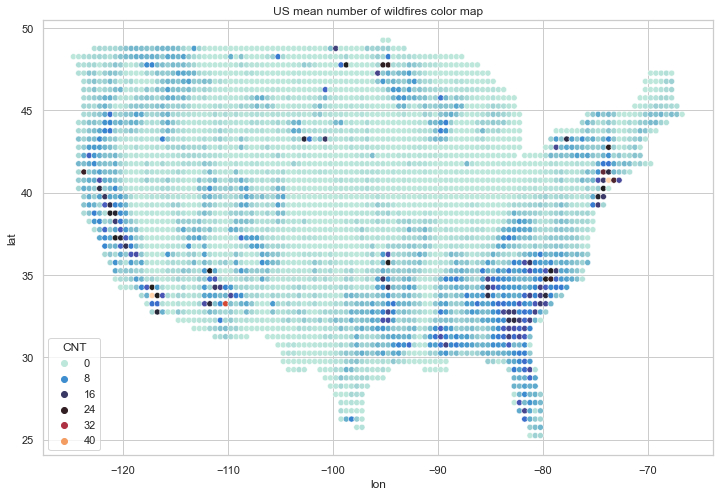

In [6]:
# Plotting wildfires map
plt.figure(figsize=(12,8))
plt.title('US mean number of wildfires color map')
sns.scatterplot(x="lon", y="lat", hue='CNT', palette='icefire', legend=True,
                data=data.groupby(by=['lon','lat'])[['CNT']].mean().reset_index());

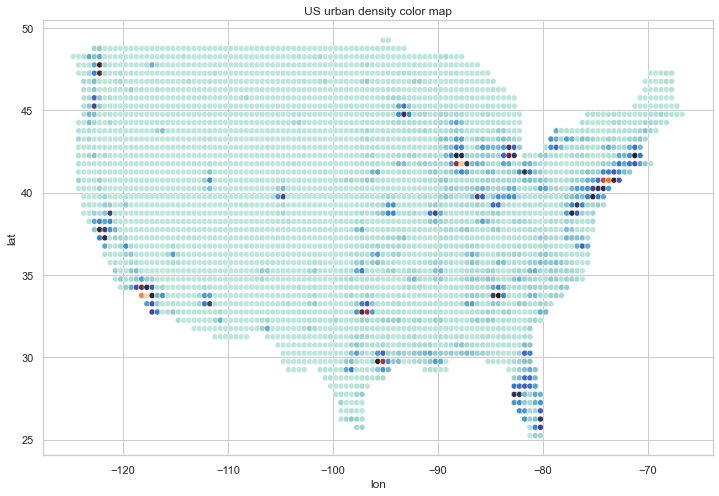

In [7]:
# Plotting Urban map
plt.figure(figsize=(12,8))
plt.title('US urban density color map')
sns.scatterplot(x="lon", y="lat", hue='lc16', palette='icefire', legend=False,
                data=data.groupby(by=['lon','lat'])[['lc16']].mean().reset_index());

It seems there is a correlation between urban density and wildfires since most of the fires start by a human error or because ecological impact on the area from construction.

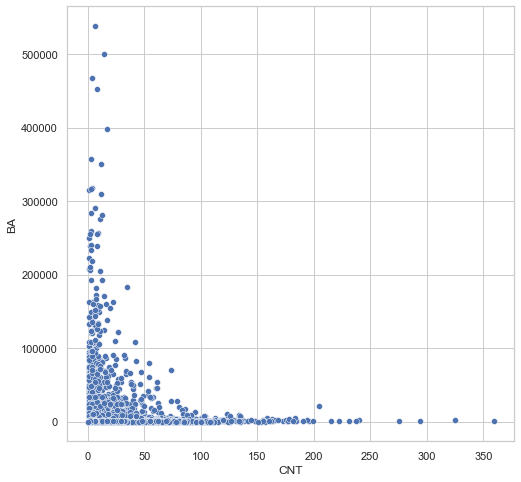

In [8]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='CNT', y='BA', data=data);

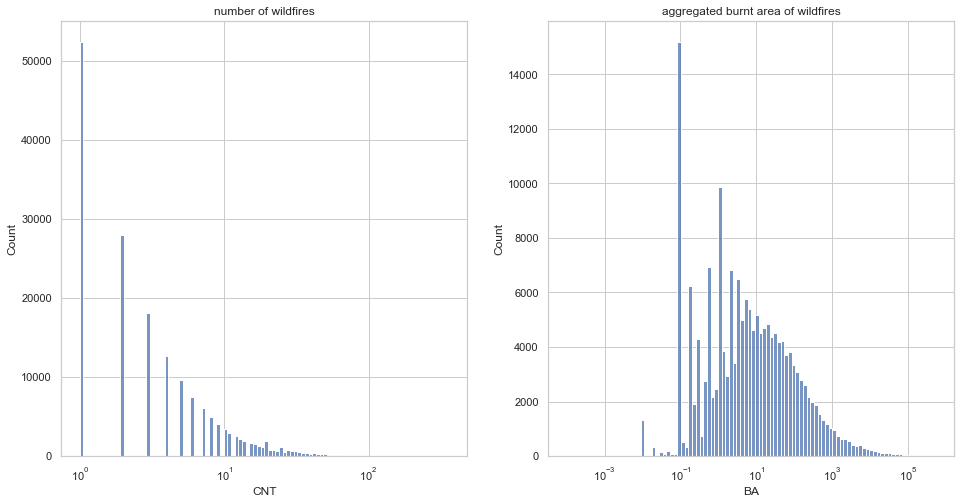

In [9]:
fig, ax = plt.subplots(1,2,figsize=(16,8))

ax[0].set_title('number of wildfires')
sns.histplot(x='CNT', log_scale=True, bins=100, data=data[data.CNT!=0], ax=ax[0])

ax[1].set_title('aggregated burnt area of wildfires')
sns.histplot(x='BA', log_scale=True, bins=100, data=data[data.BA!=0], ax=ax[1]);

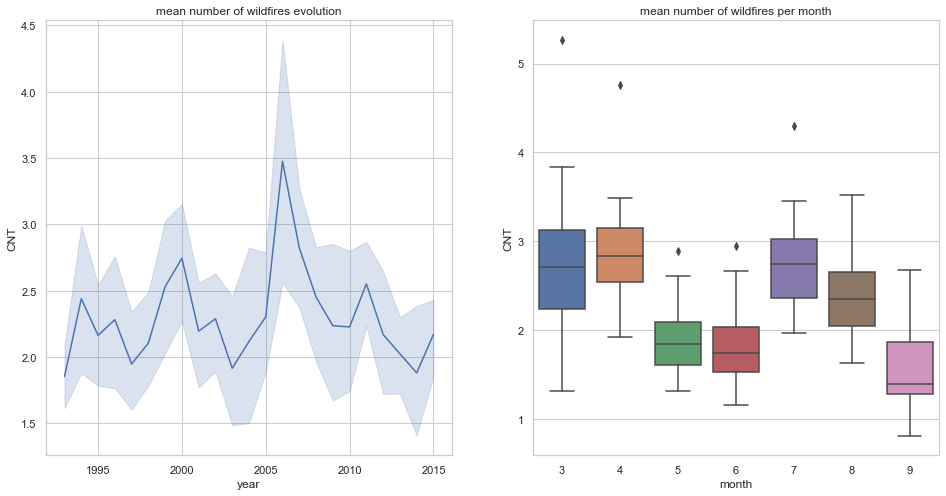

In [10]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

ax[0].set_title('mean number of wildfires evolution')
sns.lineplot(x='year', y='CNT', data=data.groupby(by=['year','month'])[['CNT']].mean().reset_index(), ax=ax[0])

ax[1].set_title('mean number of wildfires per month')
sns.boxplot(x='month', y='CNT', data=data.groupby(by=['year','month'])[['CNT']].mean().reset_index(), ax=ax[1]);

We have an increase in the number of wildfires during march and april. June and July lower (isn't it odd?).

## Analysis of land variables

1. cropland rainfed
2. cropland rainfed herbaceous cover
3. mosaic cropland
4. mosaic natural vegetation
5. tree broadleaved evergreen closed to open
6. tree broadleaved deciduous closed to open
7. tree needleleave evergreen closed to open
8. tree needleleaved deciduous closed to open
9. tree mixed
10. mosaic tree and shrub
11. shrubland
12. grassland
13. sparse vegetation
14. tree cover flooded fresh or brakish water
15. shrub or herbaceous cover flooded
16. urban
17. bare areas
18. water

In [11]:
# land variables list
land_labels = ['lc1','lc2','lc3','lc4','lc5','lc6','lc7','lc8','lc9','lc10','lc11','lc12','lc13','lc14','lc15','lc16','lc17','lc18']

In [12]:
# Which land type is the most easy to burn
data['land'] = data[land_labels].idxmax(axis=1)

data.groupby(by=['land'])[['CNT','BA']].mean().reset_index().sort_values('CNT', ascending=False)

,land,CNT,BA
6,lc16,7.646064,176.480008
12,lc7,5.060459,207.560088
5,lc15,3.318284,1812.273773
13,lc8,3.138737,516.883758
11,lc5,3.132534,35.735466
10,lc4,2.452849,10.958051
4,lc14,1.923289,121.457669
3,lc12,1.834742,127.538074
8,lc18,1.667006,62.990384
2,lc11,1.446204,337.403245


In [13]:
data.groupby(by=['land'])[['CNT','BA']].mean().reset_index().sort_values('BA', ascending=False)

,land,CNT,BA
5,lc15,3.318284,1812.273773
13,lc8,3.138737,516.883758
2,lc11,1.446204,337.403245
12,lc7,5.060459,207.560088
0,lc1,0.454910,196.959319
6,lc16,7.646064,176.480008
3,lc12,1.834742,127.538074
4,lc14,1.923289,121.457669
8,lc18,1.667006,62.990384
7,lc17,0.117347,41.966207


Urban density (human activity) seems to be the most responsible for (mean number of) fires. Howerver, for fire propagation lc15 (shrub or herbaceous cover flooded) is the most common land type for huge fires (even mean number). </br> 
Something odd: lc15 one the highest CNT mean and highest BA mean corresponds to flooded herbs. The only conclusion I got is maybe we should have different variables for fire occurence and fire duration/propagation.

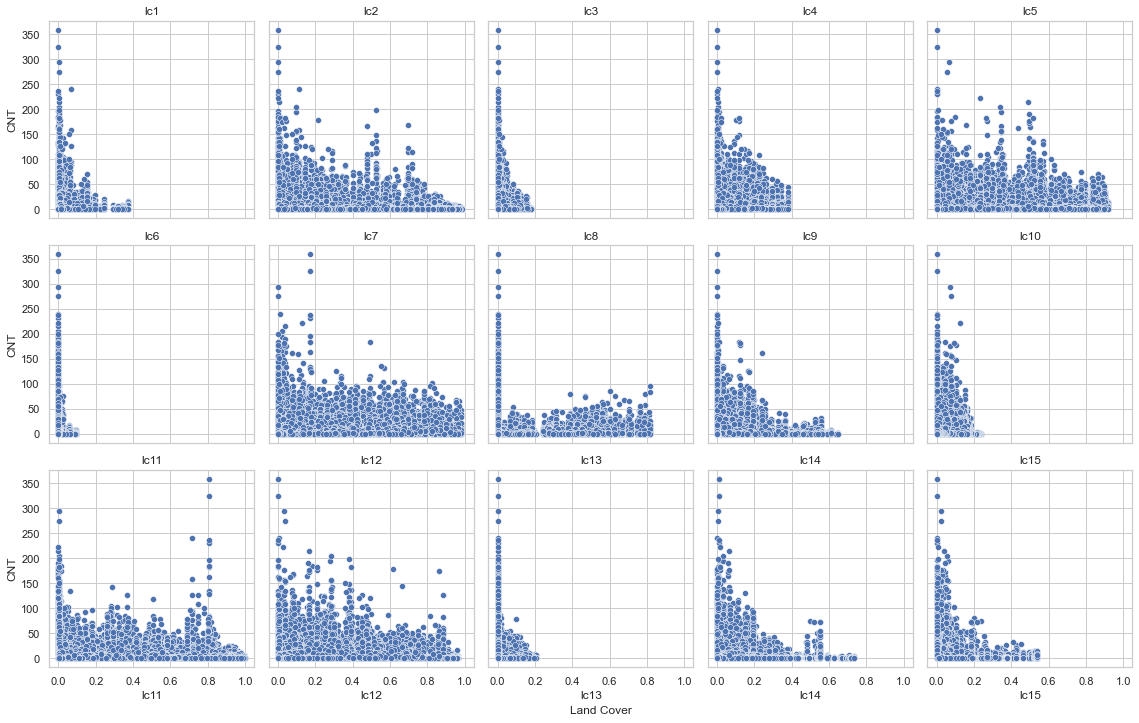

In [14]:
# 95% CI with N=1000 Bootstrap for the first 15 land variables

fig, ax = plt.subplots(3,5, figsize=(16,10), sharey=True, sharex=True)

for i in range(15):
    sbplt = ax[math.floor(i/5), i%5]
    sns.scatterplot(y=data['CNT'], x=data['lc'+str(i+1)], legend=False, ax=sbplt)
    #sns.histplot(y=data['CNT'], x=data['lc'+str(i+1)], ax=sbplt)
    #sbplt.hist(data['lc'+str(i+1)].values, bins=20)
    sbplt.set_title('lc'+str(i+1))
    
#plt.xticks([])
fig.tight_layout()
fig.text(0.5,0, 'Land Cover');

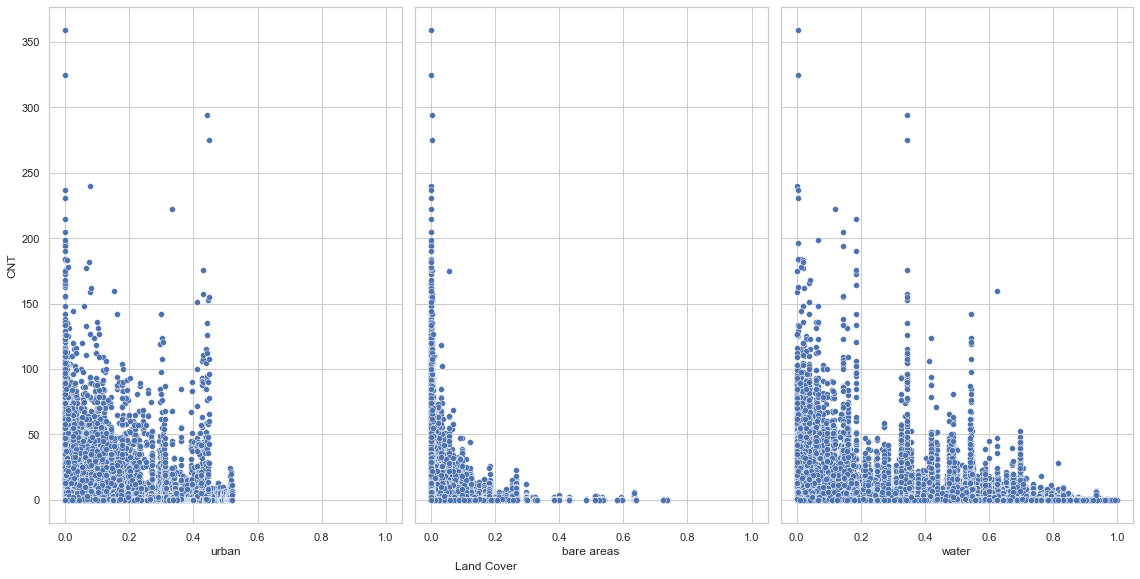

In [15]:
# Same for the last 3 land variables

fig, ax = plt.subplots(1,3, figsize=(16,8), sharey=True, sharex=True)

sns.scatterplot(y=data['CNT'], x=data['lc16'], ax=ax[0])
ax[0].set_xlabel('urban')

sns.scatterplot(y=data['CNT'], x=data['lc17'], ax=ax[1])
ax[1].set_xlabel('bare areas')

sns.scatterplot(y=data['CNT'], x=data['lc18'], ax=ax[2])
ax[2].set_xlabel('water')

fig.tight_layout()
fig.text(0.4,0, 'Land Cover');

In [16]:
# TOO SLOW
if False:
    fig, ax = plt.subplots(4,4, figsize=(16,8), sharey=True, sharex=True)

    for i in range(16):
        sbplt = ax[i%4, math.floor(i/4)]
        sns.histplot(y=data['CNT'], x=data['lc'+str(i+1)], ax=sbplt)
        #sbplt.hist(data['lc'+str(i+1)].values, bins=20)
        #sbplt.set_title('lc'+str(i+1))

    fig.tight_layout()
    fig.text(0.4,0, 'Land Cover');

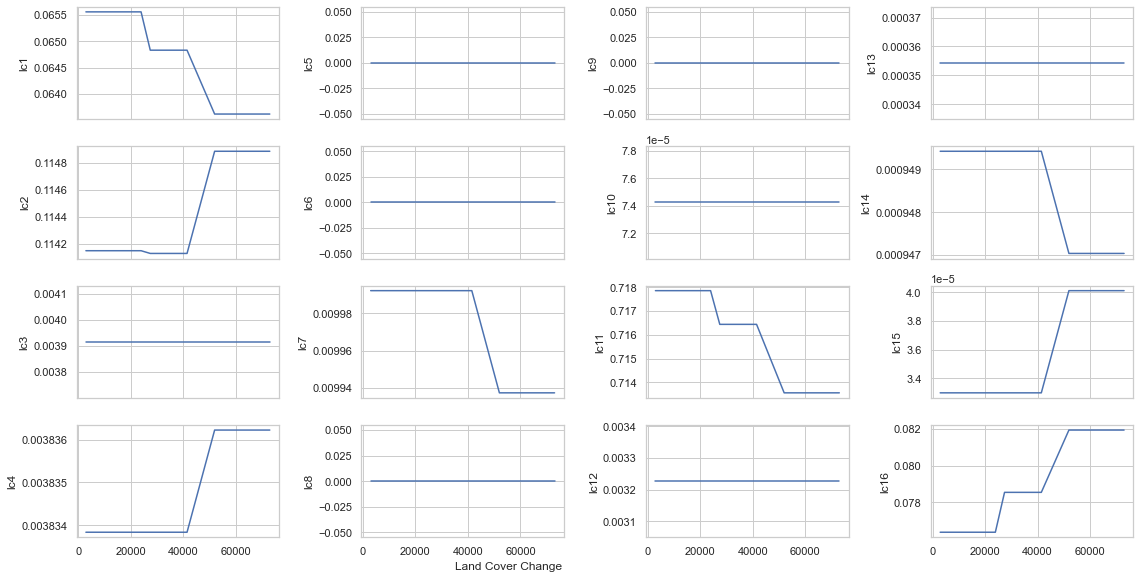

In [17]:
from sklearn.preprocessing import minmax_scale

# Another idea : let's see the change in land after a wildfire to discover the real fuels (that should decrease after a wildfire)

df = data[(data.lon==-111.75) & (data.lat==33.25) & (data.year.isin([1993,1994,1995]))]

fig, ax = plt.subplots(4,4, figsize=(16,8), sharey=False, sharex=True)

for i in range(16):
    sbplt = ax[i%4, math.floor(i/4)]
    sns.lineplot(data=df['lc'+str(i+1)], ax=sbplt)
    
fig.text(0.4,0, 'Land Cover Change')
plt.tight_layout();

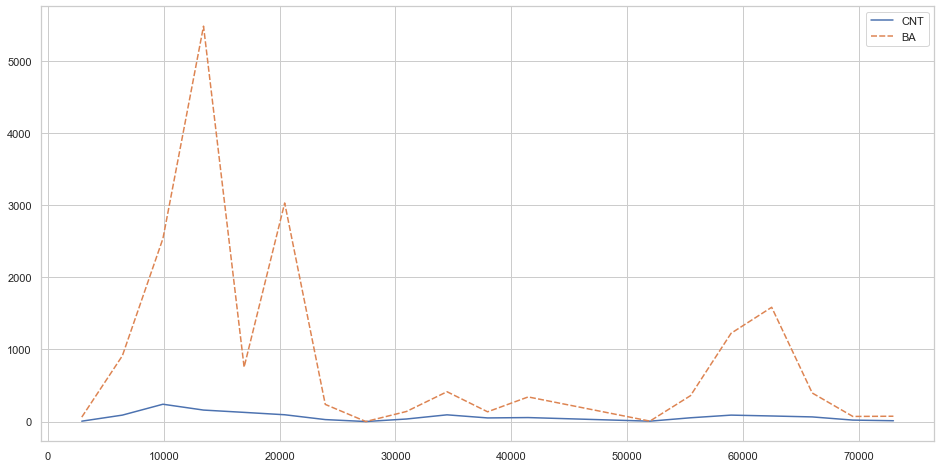

In [18]:
plt.figure(figsize=(16,8))

sns.lineplot(data=df[['CNT','BA']]);

- Shrubland (lc11) Wiki : It may be the mature vegetation type in a particular region and remain stable over time, or a transitional community that occurs temporarily as the result of a disturbance, such as fire. A stable state may be maintained by regular natural disturbance such as fire or browsing. Shrubland may be unsuitable for human habitation because of the danger of fire.

## Analysis of climate variables

1. 10m U-component of wind (the wind speed in Eastern direction) (m/s)
2. 10m V-component of wind (the wind speed in Northern direction) (m/s)
3. Dewpoint temperature (temperature at 2m from ground to which air must be cooled to become saturated with water vapor, such that condensation ensues) (Kelvin)
4. Temperature (at 2m from ground) (Kelvin)
5. Potential evaporation (the amount of evaporation of water that would take place if a sufficient source of water were available) (m)
6. Surface net solar radiation (net flux of shortwave radiation; mostly radiation coming from the sun) (J/m2)
7. Surface net thermal radiation (net flux of longwave radiation; mostly radiation emitted by the surface) (J/m2)
8. Surface pressure (Pa)
9. Evaporation (of water) (m)
10. Precipitation (m)

In [19]:
clim_labels = ['altiMean', 'altiSD', 'clim1', 'clim2', 'clim3', 'clim4', 'clim5', 'clim6', 'clim7', 'clim8','clim9', 'clim10']
data[clim_labels]

,altiMean,altiSD,clim1,clim2,clim3,clim4,clim5,clim6,clim7,clim8,clim9,clim10
0,326.264038,7.642085,0.222032,0.166899,265.457680,268.867126,-0.005898,9.187450e+06,-5231370.50,97849.906250,-0.000340,0.000448
1,320.496338,3.380354,0.184119,0.142053,265.521764,268.412354,-0.001131,6.993830e+06,-4851900.00,97954.703125,-0.000264,0.000462
2,67.726242,90.724846,-0.952649,0.856508,276.699820,280.594666,-0.010519,1.052566e+07,-4860741.00,100808.468750,-0.001945,0.004545
3,317.394775,327.259521,-0.845677,0.462569,274.943327,278.574371,-0.008420,9.359787e+06,-4653411.50,98474.648438,-0.001256,0.006174
4,1022.890808,506.424316,-0.504174,0.195447,271.235317,274.578064,-0.005976,7.479946e+06,-3889238.75,91660.625000,-0.000502,0.008110
...,...,...,...,...,...,...,...,...,...,...,...,...
563978,4.603333,1.161286,-0.464231,0.159478,296.832658,300.201447,-0.006076,1.632964e+07,-3884615.75,101323.140625,-0.004034,0.006132
563979,7.903287,2.011569,-0.649578,0.404771,297.139517,300.414673,-0.005535,1.552289e+07,-3794893.75,101300.398438,-0.003913,0.006199
563980,5.940781,3.307550,-0.849243,0.676130,297.105902,301.003082,-0.007343,1.738194e+07,-3929039.00,101333.078125,-0.004233,0.003420
563981,4.182292,1.572318,-0.838257,0.589142,297.059054,300.905426,-0.006938,1.732889e+07,-4057722.00,101332.671875,-0.004125,0.003929


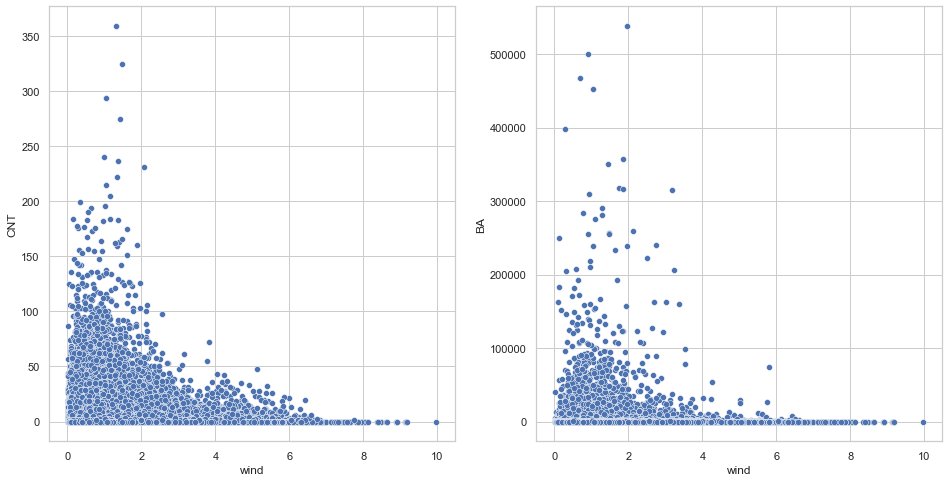

In [20]:
# Adding wind variable regardless of direction
data['wind'] = np.sqrt(data['clim1']**2+data['clim2']**2)

fig, ax = plt.subplots(1,2, figsize=(16,8))

sns.scatterplot(y=data['CNT'], x=data['wind'], ax=ax[0])
sns.scatterplot(y=data['BA'], x=data['wind'], ax=ax[1]);

CPU times: user 1min 56s, sys: 354 ms, total: 1min 57s
Wall time: 1min 43s


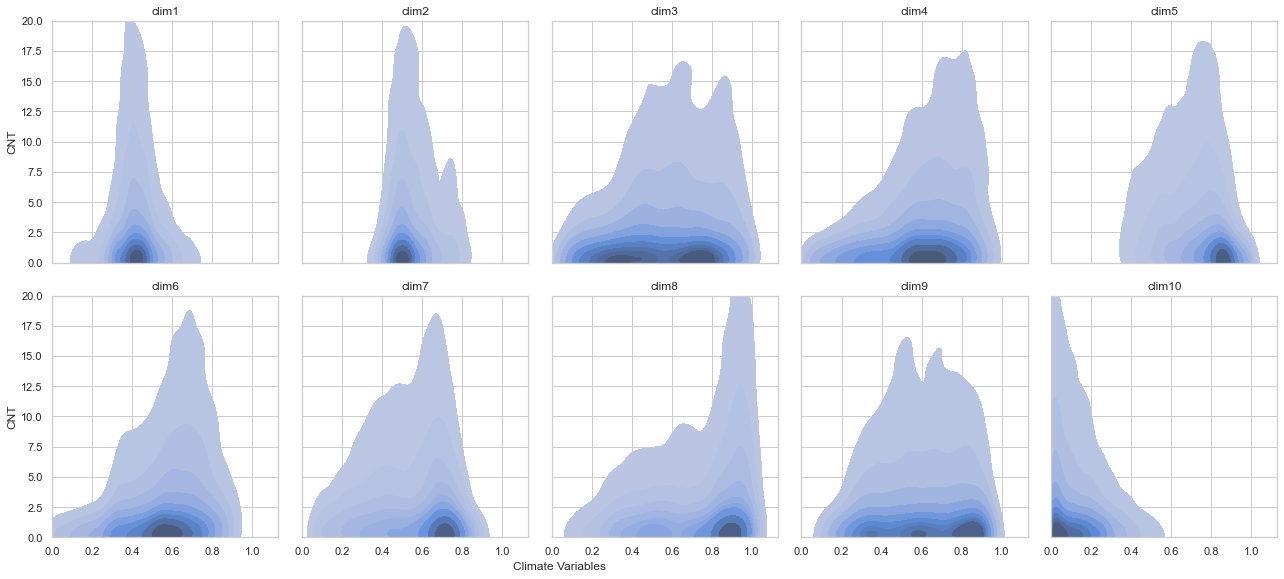

In [21]:
%%time

from sklearn.preprocessing import minmax_scale

year = 2011

fig, ax = plt.subplots(2,5, figsize=(18,8), sharey=True, sharex=True)

for i in range(10):
    sns.kdeplot(data=data[data.year==year], 
                x=minmax_scale(data[data.year==year]['clim'+str(i+1)]), y='CNT', 
                fill=True, clip=(0,20), ax=ax[math.floor(i/5), i%5])
    #sns.kdeplot(data=data[data.year<1994], x='clim'+str(i+1), y='CNT', fill=True, clip=(0,20), ax=ax[math.floor(i/5), i%5])
    ax[math.floor(i/5), i%5].set_title('clim'+str(i+1))

fig.text(0.4,0, 'Climate Variables')
fig.tight_layout();

#sns.jointplot(data=data[data.year<1994], x='clim2', y='CNT', kind='kde', fill=True, ylim=(0,20));

In [22]:
# Adding indicator for fire occurence
data['fire'] = data['CNT'].apply(lambda x: 1 if x>0 else 0)

In [23]:
# Sample of no fire rows
no_fire_pi = 10
data[data['fire']==0].sample(n=no_fire_pi, random_state=42)

,CNT,BA,lon,lat,area,year,month,lc1,lc2,lc3,...,clim4,clim5,clim6,clim7,clim8,clim9,clim10,land,wind,fire
128794,0.0,0.0,-103.75,34.75,1.00,1998,4,0.000314,0.063738,0.007808,...,285.026154,-0.008288,2.016615e+07,-9789087.0,85662.015625,-0.001647,0.000695,lc12,2.160486,0
354637,0.0,0.0,-84.75,44.25,1.00,2007,6,0.001487,0.026587,0.016081,...,293.445282,-0.025365,2.148330e+07,-6348392.5,97469.937500,-0.004304,0.002999,lc5,0.681113,0
249062,0.0,0.0,-98.25,46.75,1.00,2003,4,0.002094,0.828623,0.000302,...,279.894043,-0.005291,1.521789e+07,-6035712.0,96254.914062,-0.001686,0.001227,lc2,1.696801,0
401760,0.0,0.0,-101.25,36.25,1.00,2009,5,0.003248,0.436498,0.004272,...,291.638672,-0.008551,1.848157e+07,-7574098.5,90588.609375,-0.001992,0.001130,lc12,2.051248,0
182285,0.0,0.0,-91.25,48.25,0.40,2000,6,0.000000,0.000000,0.000000,...,286.301300,-0.015579,1.685866e+07,-4169614.0,95913.828125,-0.002458,0.003872,lc8,0.671810,0
73500,0.0,0.0,-100.25,28.25,0.37,1995,9,0.128683,0.032709,0.041032,...,300.940796,-0.008391,1.681767e+07,-6211528.5,98454.117188,-0.002285,0.003112,lc11,2.881051,0
155854,0.0,0.0,-112.25,39.75,1.00,1999,5,0.005554,0.027025,0.003067,...,284.838196,-0.005799,2.170299e+07,-9188842.0,82924.531250,-0.002835,0.001950,lc11,0.540549,0
119952,0.0,0.0,-71.25,44.25,1.00,1997,9,0.000134,0.008655,0.000096,...,285.206573,-0.011906,1.164469e+07,-4206686.5,95018.015625,-0.002248,0.002368,lc9,0.774442,0
270459,0.0,0.0,-85.75,44.75,1.00,2004,3,0.003189,0.031608,0.016535,...,272.935547,-0.004174,8.848903e+06,-3855285.5,98769.492188,-0.000417,0.003072,lc18,0.915437,0
59962,0.0,0.0,-109.75,46.25,1.00,1995,6,0.035088,0.127380,0.010274,...,286.412231,-0.006741,1.980051e+07,-6914186.5,85214.515625,-0.003674,0.004075,lc12,0.381111,0


# Modelling CNT

### Logistic Regression for fire occurence

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
# General Model (bad - nearly flip a coin)

# Splitting data to train/test
X_train, X_test, y_train, y_test = train_test_split(data.drop(['fire','land','CNT','BA','wind'], axis=1), data['fire'], test_size=0.3, random_state=42)

# Fitting LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
clf.predict_proba(X_train)
clf.predict(X_train)

# Parameters and Score
#print(pd.DataFrame(zip(X_train.columns, np.transpose(clf.coef_)), columns=['features', 'coef']))
#print()
print('Score = %2.2f %%' % (100*clf.score(X_test, y_test)))
print('Non Fire Score = %2.2f %%' % (100*clf.score(X_test[y_test==0], y_test[y_test==0])))
print('Fire Score = %2.2f %%' % (100*clf.score(X_test[y_test==1], y_test[y_test==1])))

Score = 63.52 %
Non Fire Score = 94.51 %
Fire Score = 13.49 %


In [26]:
# Trying scaler before fitting the data
scaler = StandardScaler()
#scaler = MinMaxScaler()

clf = LogisticRegression(max_iter=200, random_state=42).fit(scaler.fit_transform(X_train), y_train)

# Parameters and Score
print(pd.DataFrame(zip(X_train.columns, np.transpose(clf.coef_)), columns=['features', 'coef']))
print()
print('Score = %2.2f %%' % (100*clf.score(scaler.fit_transform(X_test), y_test)))
print('Non Fire Score = %2.2f %%' % (100*clf.score(scaler.fit_transform(X_test)[y_test==0], y_test[y_test==0])))
print('Fire Score = %2.2f %%' % (100*clf.score(scaler.fit_transform(X_test)[y_test==1], y_test[y_test==1])))

    features                     coef
0        lon    [0.14710781667448034]
1        lat   [-0.09672304663889708]
2       area    [0.10184876098172212]
3       year    [0.17852534694178893]
4      month    [-0.0710441795667049]
5        lc1   [-0.16161897791657392]
6        lc2    [-2.0163457713566575]
7        lc3   [-0.10957239245378095]
8        lc4    [-0.3701683692779832]
9        lc5     [-1.137199777146371]
10       lc6  [-0.039138315010640204]
11       lc7     [-0.909842363898767]
12       lc8    [-0.4260488342255256]
13       lc9    [-0.5545660107902312]
14      lc10   [0.010717682379322309]
15      lc11    [-2.5027352611976528]
16      lc12    [-1.6643555560397656]
17      lc13   [-0.12063805410859692]
18      lc14   [-0.24264576773670052]
19      lc15   [-0.08785838938210043]
20      lc16   [-0.17780686378765115]
21      lc17    [-0.5177551827154191]
22      lc18     [-1.300364524383101]
23  altiMean     [0.2759865160638083]
24    altiSD    [0.19923323102949084]
25     clim1

In [27]:
# Use FWI variables, urban density and water

# Labels in the data used to compute the Fire Weather Index
fwi_labels = ['clim4','wind','clim10','clim5']

# Splitting data to train/test
X_train, X_test, y_train, y_test = train_test_split(data[fwi_labels+['lc16','lc18']], data['fire'], test_size=0.3, random_state=42)

# Fitting LogisticRegression
clf = LogisticRegression(max_iter=200, random_state=42).fit(scaler.fit_transform(X_train), y_train)

# Parameters and Score
print(pd.DataFrame(zip(X_train.columns, np.transpose(clf.coef_)), columns=['features', 'coef']))
print()
print('Score = %2.2f %%' % (100*clf.score(scaler.fit_transform(X_test), y_test)))
print('Non Fire Score = %2.2f %%' % (100*clf.score(scaler.fit_transform(X_test)[y_test==0], y_test[y_test==0])))
print('Fire Score = %2.2f %%' % (100*clf.score(scaler.fit_transform(X_test)[y_test==1], y_test[y_test==1])))

  features                    coef
0    clim4  [0.040073908626549276]
1     wind  [-0.12030332481833782]
2   clim10   [-0.2623270158569354]
3    clim5   [-0.9118646936691368]
4     lc16    [0.1559094427334019]
5     lc18  [0.015818403470302455]

Score = 70.06 %
Non Fire Score = 86.64 %
Fire Score = 43.31 %


In [28]:
# Now using the data analysis and the most appropriate variables

# Labels in the data used (Nearly the FWI ...)
labels = ['clim6','lc10','clim5','clim10']

# Splitting data to train/test
X_train, X_test, y_train, y_test = train_test_split(data[labels], data['fire'], test_size=0.3, random_state=42)

# Fitting LogisticRegression
clf = LogisticRegression(max_iter=200, random_state=42).fit(scaler.fit_transform(X_train), y_train)

# Parameters and Score
print(pd.DataFrame(zip(X_train.columns, np.transpose(clf.coef_)), columns=['features', 'coef']))
print()
print('Score = %2.2f %%' % (100*clf.score(scaler.fit_transform(X_test), y_test)))
print('Non Fire Score = %2.2f %%' % (100*clf.score(scaler.fit_transform(X_test)[y_test==0], y_test[y_test==0])))
print('Fire Score = %2.2f %%' % (100*clf.score(scaler.fit_transform(X_test)[y_test==1], y_test[y_test==1])))

  features                   coef
0    clim6  [0.16895002900548609]
1     lc10  [0.20641924170110307]
2    clim5  [-0.8141937798482428]
3   clim10  [-0.1881409426254006]

Score = 70.19 %
Non Fire Score = 87.07 %
Fire Score = 42.94 %


### Generalized Linear Models

In [29]:
import statsmodels.api as sm 
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.gam.api import GLMGam, BSplines

#### GLM - log - poisson

In [30]:
# ALL LABELS USED
labels = land_labels + clim_labels + ['month']

# Splitting data to train/test
X_train, X_test, y_train, y_test = train_test_split(data[labels], data[['CNT']], test_size=0.3, random_state=42)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

# Fitting the model
model = sm.GLM(endog = y_train, 
               exog = X_train, 
               family = sm.families.Poisson())

# Model summary
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    CNT   No. Observations:               317051
Model:                            GLM   Df Residuals:                   317020
Model Family:                 Poisson   Df Model:                           30
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.6746e+05
Date:                Thu, 25 Mar 2021   Deviance:                   1.5612e+06
Time:                        12:25:24   Pearson chi2:                 4.46e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
lc1            0.0769      0.004     18.175      0.0

In [31]:
prediction = pd.concat([pd.DataFrame(results.predict(X_test), columns=['pCNT'], index=y_test.index), y_test], axis=1)
fire_error = (np.abs(prediction[prediction.CNT>0].CNT-prediction[prediction.CNT>0].pCNT)/prediction[prediction.CNT>0].CNT).mean()

print('mean absolute percentage error (MAPE) - Fire Only = %2.2f%%' % (100*fire_error))

mean absolute percentage error (MAPE) - Fire Only = 91.46%


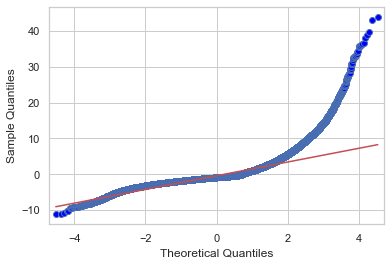

In [32]:
## QQ-Plot Residuals
fig = sm.qqplot(results.resid_deviance, line='r')
plt.show()

In [33]:
# Labels in the data used
labels = ['month','wind','altiMean','clim4','clim9','clim10','lc11','lc15','lc16']

# Splitting data to train/test
X_train, X_test, y_train, y_test = train_test_split(data[labels], data[['CNT']], test_size=0.3, random_state=42)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

# Fitting the model
model = sm.GLM(endog = y_train, 
               exog = X_train, 
               family = sm.families.Poisson())

# Model summary
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    CNT   No. Observations:               317051
Model:                            GLM   Df Residuals:                   317042
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2284e+06
Date:                Thu, 25 Mar 2021   Deviance:                   2.0832e+06
Time:                        12:25:25   Pearson chi2:                 6.80e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
month         -0.7882      0.002   -400.947      0.0

In [34]:
prediction = pd.concat([pd.DataFrame(results.predict(X_test), columns=['pCNT'], index=y_test.index), y_test], axis=1)
fire_error = (np.abs(prediction[prediction.CNT>0].CNT-prediction[prediction.CNT>0].pCNT)/prediction[prediction.CNT>0].CNT).mean()

print('mean absolute percentage error (MAPE) - Fire Only = %2.2f%%' % (100*fire_error))

mean absolute percentage error (MAPE) - Fire Only = 78.00%


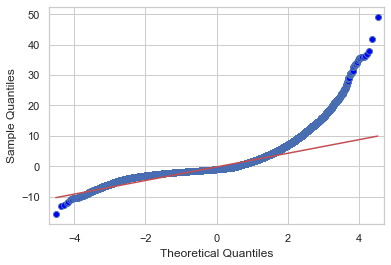

In [35]:
## QQ-Plot Residuals
fig = sm.qqplot(results.resid_deviance, line='r')
plt.show()

#### Zero Inflated Poisson

In [36]:
# Labels in the data used
labels = ['month','wind','altiMean','clim4','clim9','clim10','lc11','lc15','lc16']

# Splitting data to train/test
X_train, X_test, y_train, y_test = train_test_split(data[labels], data[['CNT']], test_size=0.3, random_state=42)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

# Fitting the model
model = sm.ZeroInflatedPoisson(endog = y_train, 
                               exog = X_train,
                               inflation = 'logit')

# Model summary
results = model.fit(maxiter=200)
print(results.summary())

/Users/monginouira/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 3.436408
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                     CNT   No. Observations:               317051
Model:             ZeroInflatedPoisson   Df Residuals:                   317042
Method:                            MLE   Df Model:                            8
Date:                 Thu, 25 Mar 2021   Pseudo R-squ.:                 -0.2641
Time:                         12:25:34   Log-Likelihood:            -1.0895e+06
converged:                        True   LL-Null:                   -8.6188e+05
Covariance Type:             nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const    -0.2963

In [37]:
#prediction = pd.concat([pd.DataFrame(results.predict(X_test), columns=['pCNT'], index=y_test.index), y_test], axis=1)
#fire_error = (np.abs(prediction[prediction.CNT>0].CNT-prediction[prediction.CNT>0].pCNT)/prediction[prediction.CNT>0].CNT).mean()

#print('Mean Relative Absolute Error - Fire Only = %2.2f' % fire_error)

results.predict(X_train), y_train

(237171    3.322990
 15888     0.673188
 385291    0.445410
 30045     0.152181
 339617    0.506253
             ...   
 319991    2.683971
 457015    0.238369
 161965    0.217966
 180993    0.316630
 151991    1.590099
 Length: 317051, dtype: float64,
         CNT
 237171  3.0
 15888   0.0
 385291  0.0
 30045   1.0
 339617  0.0
 ...     ...
 319991  0.0
 457015  1.0
 161965  0.0
 180993  0.0
 151991  0.0
 
 [317051 rows x 1 columns])

#### GAM - splines

In [38]:
# Labels in the data used
labels = ['month','wind','altiMean','clim4','clim9','clim10','lc11','lc15','lc16']

# Splitting data to train/test
X_train, X_test, y_train, y_test = train_test_split(data[labels], data[['CNT']], test_size=0.3, random_state=42)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

# Defining splines 
bs_1 = BSplines(X_train[['clim4']], df=4, degree=2)
bs_2 = BSplines(X_train[['clim4','clim10']], df=[4,4], degree=[2,2])

# Fitting the model
model = GLMGam(endog = y_train, 
               exog = X_train[['month']], 
               smoother = bs_2, 
               family = sm.families.Poisson())

# Model summary
results = model.fit(maxiter=200)
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    CNT   No. Observations:               317051
Model:                         GLMGam   Df Residuals:                   317044
Model Family:                 Poisson   Df Model:                         6.00
Link Function:                    log   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:            -1.2943e+06
Date:                Thu, 25 Mar 2021   Deviance:                   2.2150e+06
Time:                        12:25:36   Pearson chi2:                 5.10e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
month         -0.3112      0.002   -197.876      0.0

# Modelling BA

In [39]:
# Labels in the data used
labels = ['wind','altiMean','clim4','clim10','lc11','lc15','lc16']

# Splitting data to train/test
X_train, X_test, y_train, y_test = train_test_split(data[labels], data[['BA']], test_size=0.3, random_state=42)
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

# Fitting the model
model = sm.GLM(endog = y_train, 
               exog = X_train, 
               family = sm.families.Gaussian(sm.families.links.log()))

# Model summary
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     BA   No. Observations:               317051
Model:                            GLM   Df Residuals:                   317044
Model Family:                Gaussian   Df Model:                            6
Link Function:                    log   Scale:                      1.1985e+07
Method:                          IRLS   Log-Likelihood:            -3.0337e+06
Date:                Thu, 25 Mar 2021   Deviance:                   3.7998e+12
Time:                        12:25:37   Pearson chi2:                 3.80e+12
No. Iterations:                    28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
wind          -0.3286      0.027    -12.297      0.0

In [40]:
prediction = pd.concat([pd.DataFrame(results.predict(X_test), columns=['pBA'], index=y_test.index), y_test], axis=1)
error = (np.abs(prediction[prediction.BA>0].BA-prediction[prediction.BA>0].pBA)/prediction[prediction.BA>0].BA).mean()

print('mean absolute percentage error (MAPE) - Fire Only = %2.2f%%' % (100*error))

mean absolute percentage error (MAPE) - Fire Only = 29061.71%


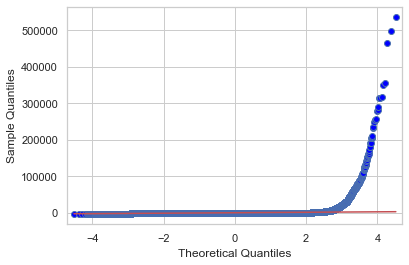

In [41]:
## QQ-Plot Residuals
fig = sm.qqplot(results.resid_deviance, line='r')
plt.show()

# Validation Set

In [42]:
# Distribution of missing data
missing_data = data_validation.groupby('year')[['CNT','BA','lon']].count()
missing_data.rename(columns={'lon': 'total'}, inplace=True)
missing_data['CNT'] = missing_data.total - missing_data.CNT
missing_data['BA'] = missing_data.total - missing_data.BA
missing_data

,CNT,BA,total
year,,,
1994,7374,7763,10389
1996,6874,6952,9672
1998,7382,7179,9972
2000,7536,7170,10138
2002,7596,7096,10242
2004,7021,7217,9933
2006,7322,7038,9964
2008,7351,7772,10452
2010,7361,7641,10415


In [43]:
# Land Cover
data_validation[land_labels].describe()

,lc1,lc2,lc3,lc4,lc5,lc6,lc7,lc8,lc9,lc10,lc11,lc12,lc13,lc14,lc15,lc16,lc17,lc18
count,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000
mean,0.011267,0.169309,0.008703,0.039918,0.091151,0.000384,0.140786,0.015555,0.024476,0.009346,0.187106,0.184370,0.002099,0.015366,0.007433,0.013069,0.010298,0.066050
std,0.026214,0.255583,0.017337,0.059868,0.174969,0.004647,0.208366,0.085672,0.072803,0.018903,0.301780,0.237019,0.011604,0.045587,0.029236,0.036799,0.042567,0.175451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001130,0.003423,0.000576,0.003011,0.000000,0.000000,0.000764,0.000000,0.000000,0.000221,0.000413,0.014765,0.000000,0.000032,0.000079,0.000223,0.000149,0.001158
50%,0.003872,0.032166,0.002547,0.013335,0.001482,0.000000,0.026837,0.000000,0.000153,0.001561,0.008440,0.068955,0.000076,0.000709,0.000647,0.002305,0.000796,0.006839
75%,0.009535,0.232371,0.008654,0.049815,0.089065,0.000000,0.210371,0.000000,0.009978,0.009127,0.255364,0.270456,0.000419,0.006337,0.003098,0.008987,0.003458,0.027060
max,0.375089,0.988417,0.176975,0.382161,0.917611,0.096545,0.982913,0.814536,0.649428,0.230381,0.999242,0.964968,0.204354,0.732465,0.537217,0.518609,0.736066,1.000000


In [44]:
# Climate
data_validation[clim_labels].describe()

,altiMean,altiSD,clim1,clim2,clim3,clim4,clim5,clim6,clim7,clim8,clim9,clim10
count,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,111053.000000,1.110530e+05,1.110530e+05,111053.000000,111053.000000,1.110530e+05
mean,771.702226,114.151408,0.343141,0.524200,280.594060,290.193929,-0.012096,1.768349e+07,-7.037391e+06,92939.606324,-0.002300,2.262648e-03
std,712.582048,126.735084,0.910203,0.911463,8.676039,8.254226,0.007166,3.833150e+06,2.501854e+06,7539.022479,0.001288,1.761580e-03
min,1.109576,0.000000,-5.006887,-5.350661,256.781434,261.814606,-0.056349,3.537317e+06,-1.635055e+07,67480.117188,-0.006438,4.444519e-07
25%,214.425827,23.792587,-0.127085,-0.024468,273.664950,285.154816,-0.016140,1.535604e+07,-8.451301e+06,87039.992188,-0.003359,8.907118e-04
50%,462.406097,51.995140,0.375857,0.394958,280.881152,291.592590,-0.009775,1.782945e+07,-6.218574e+06,96095.835938,-0.002274,1.929479e-03
75%,1290.424438,182.347046,0.852706,0.923087,287.935405,296.488129,-0.007150,2.022605e+07,-5.204926e+06,98969.492188,-0.001209,3.268180e-03
max,3369.013428,975.300049,7.109306,6.209711,298.096923,309.566345,0.000475,2.857818e+07,-1.165547e+06,102226.859375,0.000475,2.109621e-02


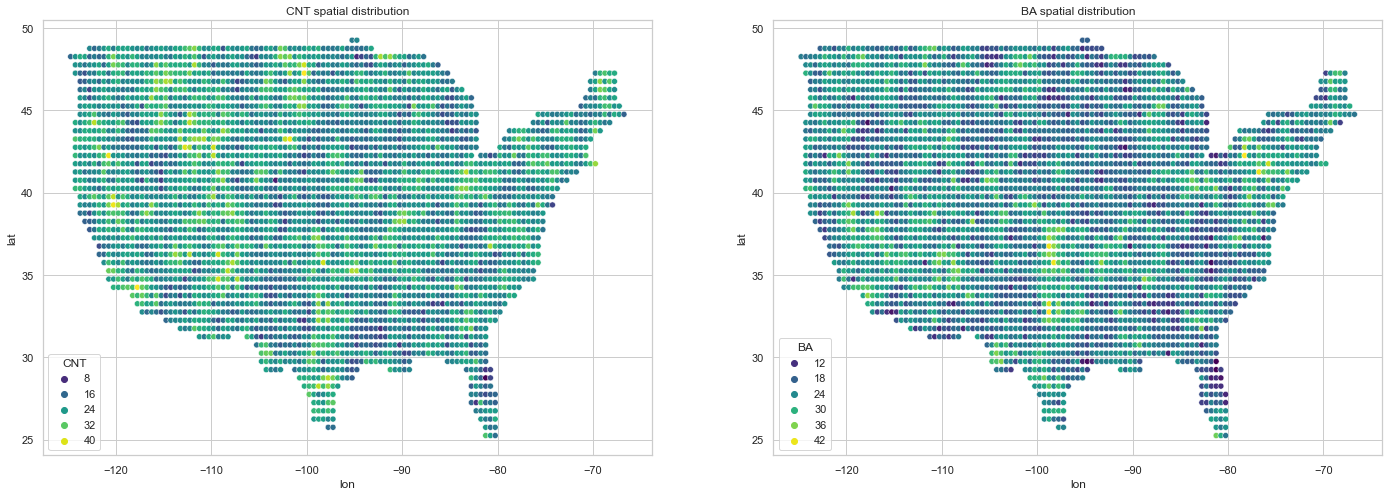

In [45]:
# Spatial distribution in the validation set
fig, ax = plt.subplots(1,2, figsize=(24,8))

sns.scatterplot(x="lon", y="lat", hue='CNT', palette='viridis', legend=True, 
                data=data_validation.groupby(by=['lon','lat']).agg({'CNT': lambda x: x.isnull().sum()}).reset_index(), 
                ax=ax[0])
ax[0].set_title('CNT spatial distribution')

sns.scatterplot(x="lon", y="lat", hue='BA', palette='viridis', legend=True, 
                data=data_validation.groupby(by=['lon','lat']).agg({'BA': lambda x: x.isnull().sum()}).reset_index(), 
                ax=ax[1])
ax[1].set_title('BA spatial distribution');

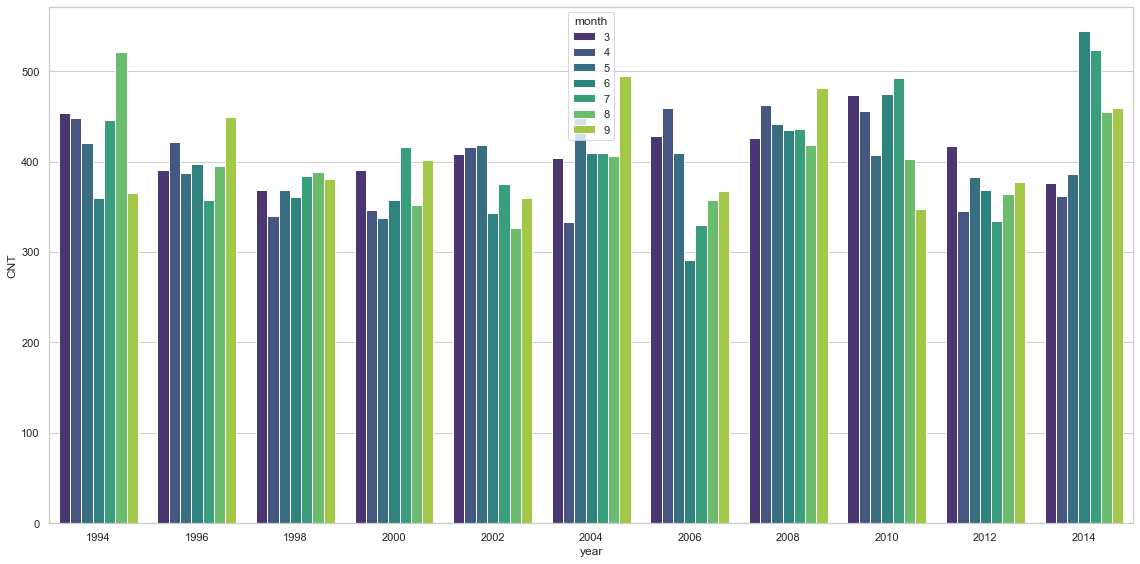

In [46]:
# Temporal distribution in the validation set
plt.figure(figsize=(16,8))
sns.barplot(x='year', y='CNT', hue='month', palette='viridis',
            data=data_validation.groupby(by=['year','month'])[['CNT']].count().reset_index());
plt.tight_layout()

# Final Benchmark

In [47]:
def prediction_score(actual, prediction):
    
    # Defining Thresholds
    u_CNT_tab = list(range(1,11))+[2*x for x in range(6,16)]+[10*x for x in range(4,11)]
    u_BA_tab  = [0,1]+[10*x for x in range(1,11)]+[50*x for x in range(3,7)]+[400,500,1000,1500,2000,5000]+[10000*x for x in range(1,6)]+[100000]
    
    # Computing Scores
    S_CNT = 0
    S_BA  = 0
    
    for i in range(len(actual)):
        for u_CNT in u_CNT_tab:
            w = 1-(1+((u_CNT+1)**2)/1000)**(-1/4)
            S_CNT = S_CNT + w*(int(u_CNT>=actual[i,1])-prediction[i,1])**2
            
    for i in range(len(actual)):
        for u_BA in u_BA_tab:
            w = 1-(1+(u_BA+1)/1000)**(-1/4)
            S_BA = S_BA + w*(int(u_BA>=actual[i,2])-prediction[i,2])**2
            
    S_TOTAL = S_CNT + S_BA
    
    # Return Scores
    return [S_CNT, S_BA, S_TOTAL]